<a href="https://colab.research.google.com/github/Sanjay550055/E-commerce-website/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 0.6169983606557379
Mean Squared Error: 0.8654553326229504
R² Score: 0.9624296343832457


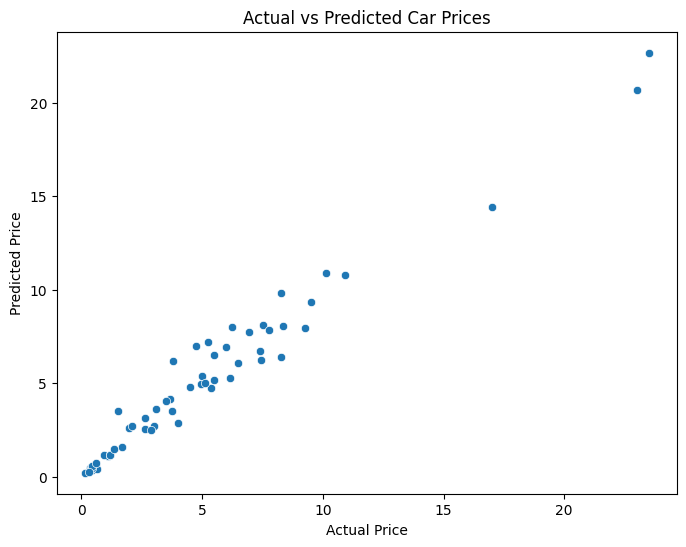

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("car data.csv")

# Drop 'Car_Name' as it is not useful for numerical modeling
df = df.drop(['Car_Name'], axis=1)

# Convert categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Feature Engineering: Create a new column 'Car_Age'
df['Car_Age'] = 2024 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

# Define features and target
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['Present_Price', 'Driven_kms', 'Car_Age']] = scaler.fit_transform(X_train[['Present_Price', 'Driven_kms', 'Car_Age']])
X_test[['Present_Price', 'Driven_kms', 'Car_Age']] = scaler.transform(X_test[['Present_Price', 'Driven_kms', 'Car_Age']])

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
